## YOLOv5
https://github.com/ultralytics/yolov5.git

### hhw 데이터셋 가져오기

* 안전모 데이터셋: https://public.roboflow.com/object-detection/hard-hat-workers

https://public.roboflow.com/ds/HSzjb19j05?key=mYws4wS3W4

In [4]:

from IPython.display import Image, clear_output

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16965, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 16965 (delta 82), reused 99 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16965/16965), 15.71 MiB | 8.72 MiB/s, done.
Resolving deltas: 100% (11615/11615), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00


In [ ]:
https://public.roboflow.com/ds/9DRkedEb57?key=1FOBDOArRy

In [6]:
%mkdir /content/yolov5/hhw
%cd /content/yolov5/hhw

/content/yolov5/hhw


In [ ]:
!curl -L "https://public.roboflow.com/ds/9DRkedEb57?key=1FOBDOArRy" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [8]:
!ls train/

images	labels


In [11]:
import glob
import random
from IPython.display import Image, display
file = random.choice(glob.glob('/content/yolov5/hhw/test/labels/*.txt'))
with open(file, 'r')as file:
    # 파일의 내용을 릭고 출력
    content = file.read()
    print(content)

1 0.3125 0.34615384615384615 0.038461538461538464 0.04567307692307692
1 0.4855769230769231 0.49038461538461536 0.040865384615384616 0.04807692307692308
1 0.6610576923076923 0.35336538461538464 0.036057692307692304 0.038461538461538464
2 0.33413461538461536 0.4423076923076923 0.11057692307692307 0.24278846153846154
2 0.49278846153846156 0.5769230769230769 0.11057692307692307 0.21394230769230768
2 0.6586538461538461 0.3870192307692308 0.08173076923076923 0.0985576923076923
1 0.3137019230769231 0.01201923076923077 0.040865384615384616 0.02403846153846154
1 0.6610576923076923 0.007211538461538462 0.038461538461538464 0.014423076923076924


YOLOv5 모델이 실행될 때, **사전 학습된 가중치 파일**이 자동으로 다운로드되는 과정
- **GitHub**에서 직접적으로 `releases` 폴더가 보이지 않는데도, 어떻게 가중치 파일을 다운로드할 수 있는지에 대한 이유는 **GitHub Releases 기능**과 관련이 있습니다.

### GitHub Releases 기능
- **GitHub Releases**는 프로젝트의 특정 버전과 관련된 **파일(예: 바이너리 파일, 모델 가중치 등)**을 호스팅하기 위한 기능입니다. 이를 통해 프로젝트의 개발자는 **릴리스 버전**을 쉽게 관리하고, 사용자들은 해당 버전의 특정 파일을 쉽게 다운로드할 수 있습니다.
- **릴리스(Release)**는 GitHub에서 보통 프로젝트의 주요 버전 변경, 업데이트 또는 기능 개선을 기념하여 생성됩니다. 그와 함께 프로젝트와 연관된 파일들을 업로드할 수 있으며, 이는 URL을 통해 사용자에게 공개됩니다.

- **`releases` 폴더**는 로컬에 존재하지 않고, **GitHub의 Releases 기능**을 통해 관리됩니다.
- `detect.py` 실행 시, 사전 학습된 가중치 파일이 로컬에 없으면 **GitHub Releases URL**을 통해 자동으로 파일을 다운로드합니다.
- **GitHub Releases**는 프로젝트와 관련된 버전 파일들을 배포하고 다운로드하는데 사용되며, URL을 통해 접근할 수 있습니다.


In [12]:
%pwd


'/content/yolov5/hhw'

In [13]:
%cd ..


/content/yolov5


#### hhw 데이터셋 roboflow에서 가져와서 hhw 폴더로 저장하기

In [14]:
!ls

benchmarks.py	 data	    hubconf.py	 pyproject.toml    runs		   utils
CITATION.cff	 detect.py  LICENSE	 README.md	   segment	   val.py
classify	 export.py  models	 README.zh-CN.md   train.py	   yolov5s.pt
CONTRIBUTING.md  hhw	    __pycache__  requirements.txt  tutorial.ipynb


In [15]:
!python detect.py --weights yolov5s.pt --img 416 --conf 0.25 --source hhw/test/images/

detect: weights=['yolov5s.pt'], source=hhw/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-369-g907bef2f Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1766 /content/yolov5/hhw/test/images/005298_jpg.rf.7d1070e4a462d4c636a68e64f2013761.jpg: 416x416 6 persons, 7.4ms
image 2/1766 /content/yolov5/hhw/test/images/005299_jpg.rf.a79cacc62cdd99ad871cf1786ad865ff.jpg: 416x416 (no detections), 7.9ms
image 3/1766 /content/yolov5/hhw/test/image

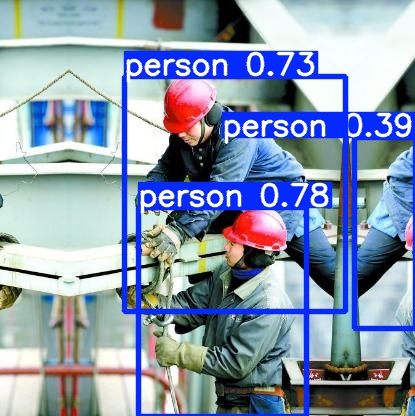

In [17]:
import glob
import random
from IPython.display import Image, display

file = random.choice(glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'))
display(Image(filename=file))

**`glob`** 모듈
- 특정 디렉토리 내에 있는 이미지 파일들을 찾아 목록으로 반환하고, 해당 목록의 길이(즉, 파일 개수)를 출력하는 코드입니다. 이 코드는 **YOLOv5**의 학습 및 테스트 이미지 파일 목록을 생성하는 데 사용될 수 있습니다. 각 부분을 자세히 설명하면 다음과 같습니다.

- **`from glob import glob`**
   - **`glob`** 모듈은 파일 경로 패턴을 사용하여 파일 목록을 검색하는 기능을 제공합니다. `glob`는 파일 경로의 패턴(예: `*.jpg`)과 일치하는 파일들을 찾아서 리스트로 반환합니다.
   - `glob`는 주로 **와일드카드**를 사용하여 파일 이름을 검색합니다. 예를 들어, `*.jpg`는 특정 디렉토리 내에서 `.jpg` 확장자를 가진 모든 파일을 검색하는 데 사용됩니다.

- **`train_img_list = glob('/content/yolov5/hhw/train/images/*.jpg')`**
   - **`'/content/yolov5/hhw/train/images/*.jpg'`** 경로에서 `*.jpg` 패턴과 일치하는 모든 파일을 찾습니다.
   - `/content/yolov5/hhw/train/images/`는 이미지가 저장된 디렉토리 경로를 나타냅니다. 이 경로에서 **모든 `.jpg` 형식의 파일**을 찾고, 그 파일들의 경로를 리스트로 반환합니다.
   - **`train_img_list`**는 해당 경로에서 찾은 **훈련 이미지 파일들의 경로 목록**을 저장하는 리스트입니다.


- **`test_img_list = glob('/content/yolov5/hhw/test/images/*.jpg')`**
   - **`'/content/yolov5/hhw/test/images/*.jpg'`** 경로에서 `*.jpg` 패턴과 일치하는 모든 **테스트 이미지 파일**을 검색합니다.
   - `/content/yolov5/hhw/test/images/` 디렉토리 내에 있는 `.jpg` 파일들을 모두 찾아, 그 경로를 리스트로 반환합니다.
   - **`test_img_list`**는 테스트 이미지 파일들의 경로 목록을 저장합니다.     ```

- 이 코드는 **훈련 이미지**와 **테스트 이미지**의 경로를 특정 폴더에서 찾아 각각의 리스트(`train_img_list`, `test_img_list`)에 저장합니다.
- 그런 다음, 해당 디렉토리 내에서 찾은 **이미지 파일의 개수**를 출력합니다.


In [19]:
import yaml

from glob import glob

train_img_list = glob('/content/yolov5/hhw/train/images/*.jpg')
test_img_list = glob('/content/yolov5/hhw/test/images/*.jpg')

print(len(train_img_list), len(test_img_list))

5269 1766


In [20]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(train_img_list, test_size=0.5, random_state=777)
print(len(test_img_list), len(val_img_list))

1766 2635


In [23]:
# join 함수를 이용하여 각 이미지 리스트를 개행 문자를 이용하여 하나의 문자열로 합쳐서 각 파일에 쓴다
import yaml

with open('/content/yolov5/hhw/train.txt','w') as f :
    f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov5/hhw/test.txt','w') as f :
    f.write('\n'.join(test_img_list) + '\n')

with open ('/content/yolov5/hhw/val.txt','w') as f :
    f.write('\n'.join(val_img_list) + '\n')


In [24]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [41]:
%cat /content/yolov5/hhw/data.yaml

train: ./hhw/train.txt
test: ./hhw/test.txt
val: ./hhw/val.txt

nc: 3
names: ['head', 'helmet', 'person']


In [37]:
%%writetemplate /content/yolov5/hhw/data.yaml
train: ./hhw/train.txt
test: ./hhw/test.txt
val: ./hhw/val.txt

nc: 3
names: ['head', 'helmet', 'person']


In [40]:
%cat /content/yolov5/hhw/data.yaml

train: ./hhw/train.txt
test: ./hhw/test.txt
val: ./hhw/val.txt

nc: 3
names: ['head', 'helmet', 'person']


In [39]:
with open('/content/yolov5/hhw/data.yaml','r') as stream :
    num_classes = str(yaml.safe_load(stream)['nc'])
num_classes

'3'

In [45]:
%cat /content/yolov5/models/yolov5s.yaml

# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4],

In [43]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: {num_classes} # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)
  ]

In [46]:
%pwd

'/content/yolov5'

In [47]:


%%time
%cd /content/yolov5
!python train.py --img 416 --batch 16 --epochs 30 --data /content/yolov5/hhw/data.yaml --cfg /content/yolov5/models/custom_yolov5s.yaml --weights yolov5s.pt

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  with torch.cuda.amp.autocast(amp):
      15/29      1.94G    0.03606    0.02626   0.004104        115        416:  12% 20/165 [00:04<00:41,  3.48it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      15/29      1.94G    0.03621    0.02612   0.004024        101        416:  13% 21/165 [00:05<00:41,  3.50it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      15/29      1.94G    0.03617    0.02586   0.004053         84        416:  13% 22/165 [00:05<00:44,  3.19it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      15/29 

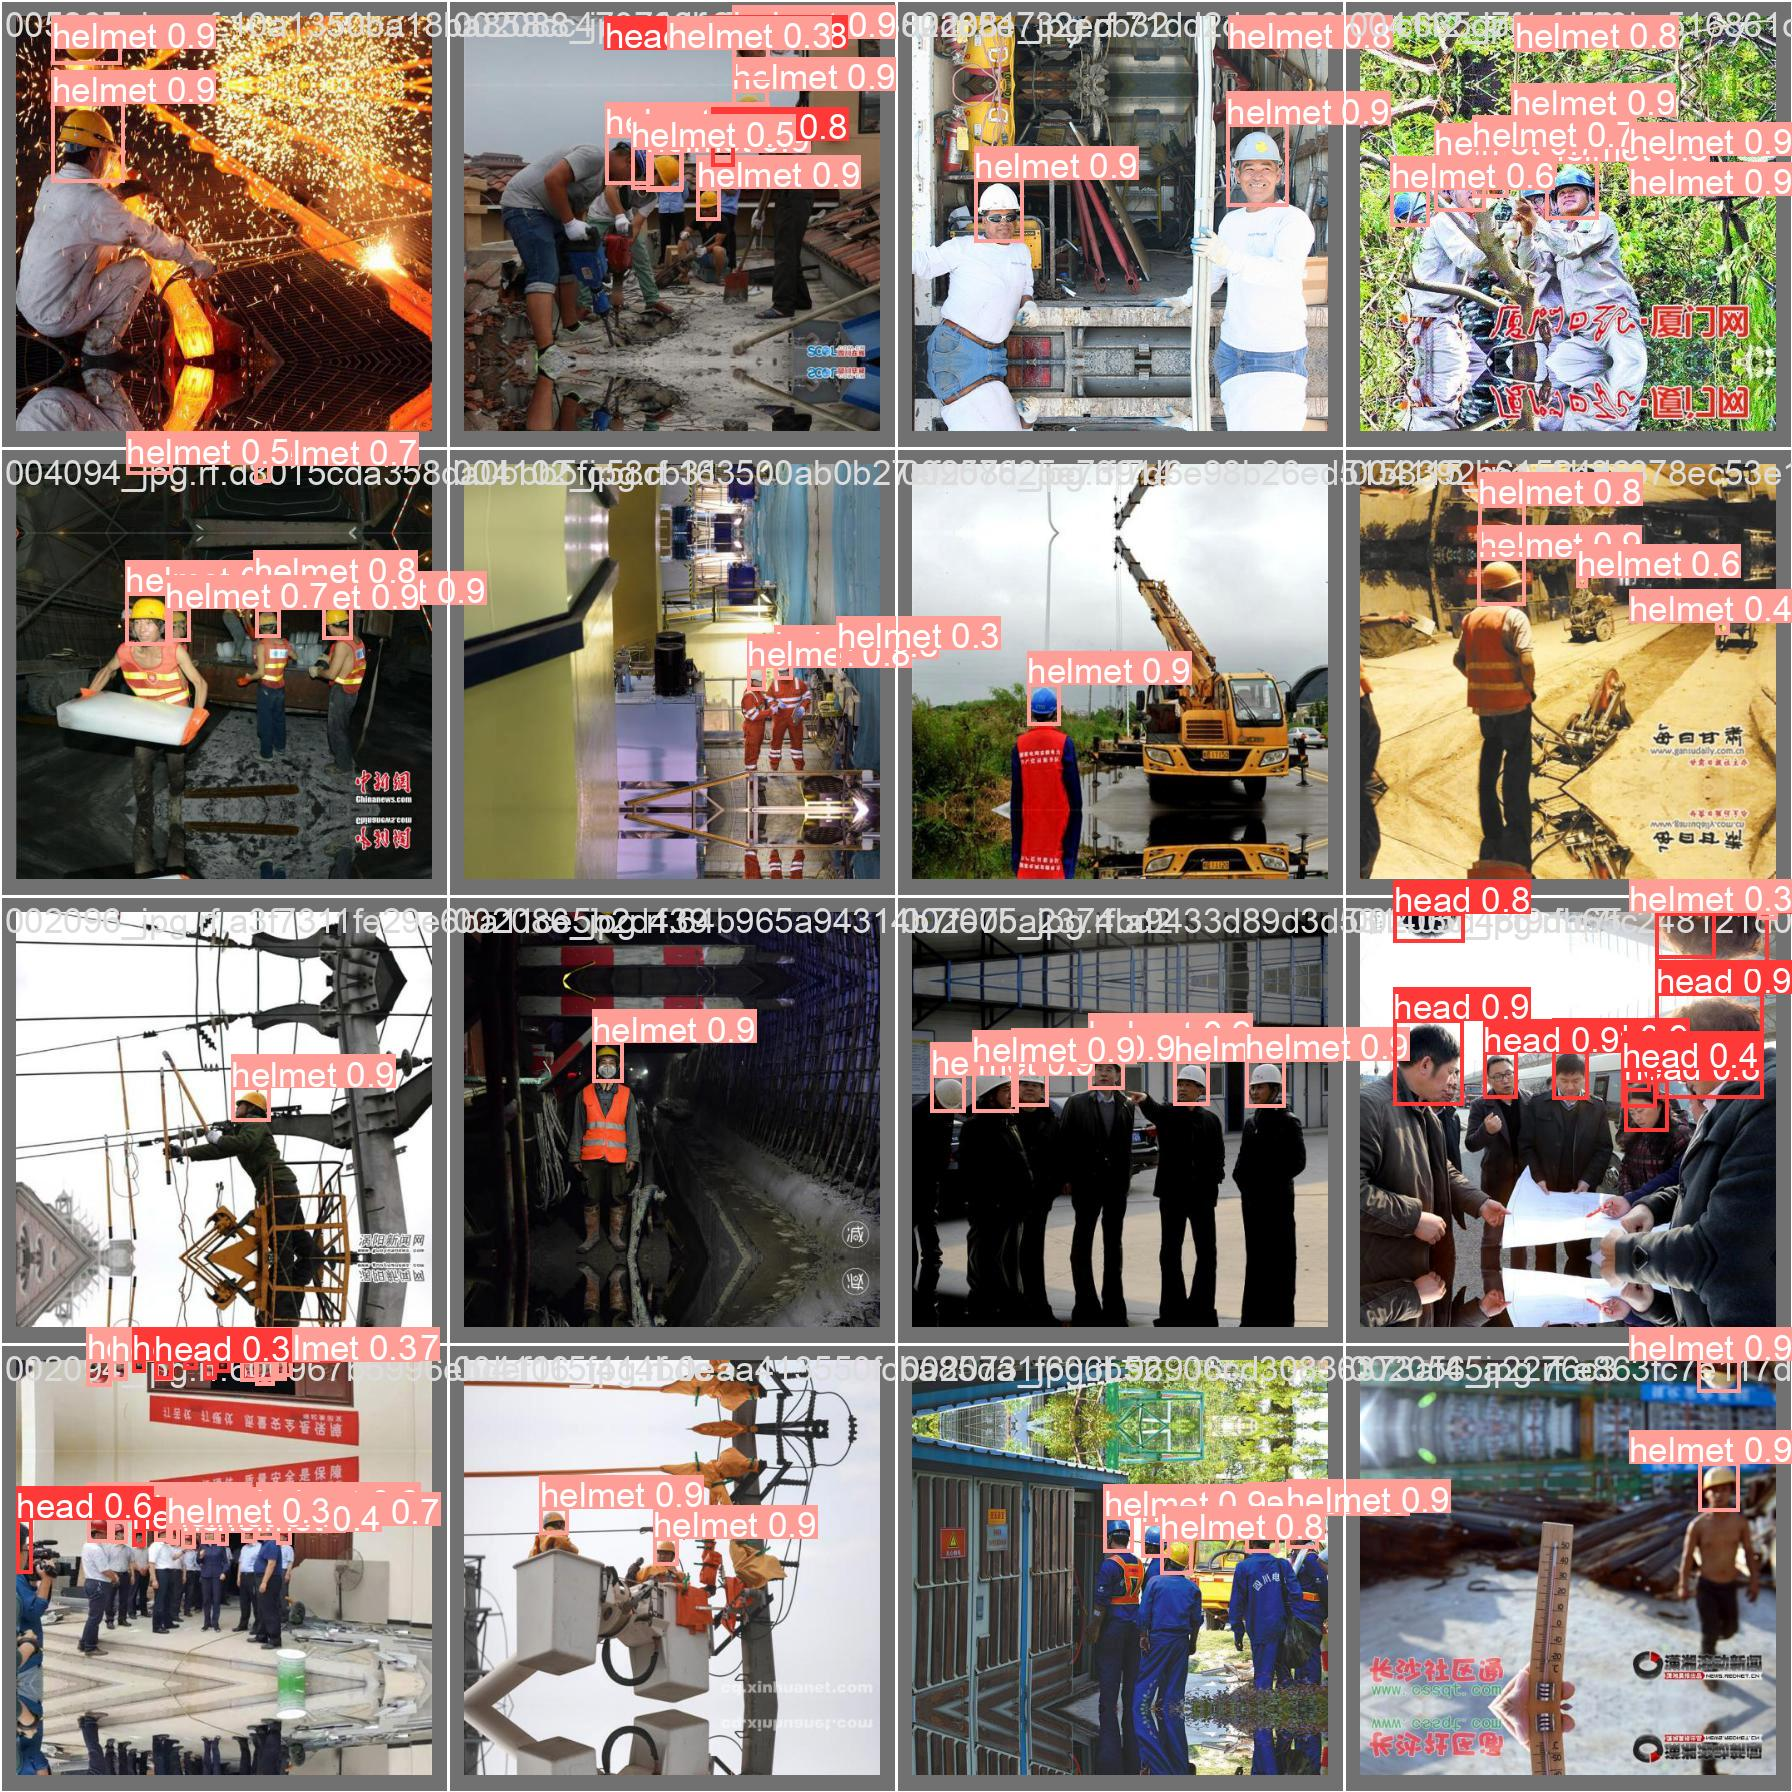

In [54]:
Image(filename="/content/yolov5/runs/train/exp/val_batch0_pred.jpg", width=900)